<a href="https://colab.research.google.com/github/amanchauhan786/NIRAKSHAK-WE_INSPECT/blob/main/Task1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image Processing for Creating a 2D Map 🗺️

In [ ]:
# Installations 📥
# Before proceeding further, you need to install the some packages. To do that, follow these commands:

# Install openCV - This package provides various tools and algorithms for image and video processing, object detection, feature extraction, and more.


# pip3 install opencv-contrib-python
# Install imutils - This package make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV and Python.


# pip3 install imutils
# Install NumPy - This package is used for working with arrays. It has functions for working in domain of linear algebra, fourier transform, and matrices.


# pip3 install numpy

In [ ]:
# Apply Perspective Transform

# Load the given image task1c_image.jpg into your image processing environment.

# Use an Aruco detection algorithm to locate and identify the four Aruco markers in the image. These corners will serve as the reference points for the perspective transform.

# Define a set of four destination points that correspond to the desired output perspective. These points should form a rectangular or square shape in the transformed image. Ensure that the order of the destination points matches the order of the Aruco marker points.

# Use the identified Aruco marker points and the defined destination points to calculate the perspective transformation matrix. Apply the perspective transformation to the original image, producing a new image with the desired perspective.

# Find Obstacles

# Use transformed image, and then find the obstacles in the given image using openCV algorithms (understand the goal of this task and refer to learning resources to find out right algorithm for this problem).
# At the end you need to generate a .txt file which should contain

# List of Aruco's detected
# No of Obstacles
# Total Area covered by obstacles

In [ ]:
# Navigate to your workspace.


# cd pico_ws/src/swift_pico/scripts/
# Open Python file map.py or CPP file map.cpp as per your choice and complete the script to achieve the given task.

# Add an argument parser in the script to accept the path of image to be used for detection. The argument should be named as --image . Refer this resources to understand: How to add arguments in python and How to add arguments in CPP should be as follows.

# For Python


# python3 map.py --image task1c_image.jpg
# For CPP


# g++ -o map map.cpp $(pkg-config --cflags --libs opencv4)
# ./map --image task1c_image.jpg
# NOTE : DO NOT hard code the name of the image to be processed, the image will be passed using the argument parser as shown above, the evaluation will be done by passing different test images when you submit on the portal.

# The script should generate an output image as shown in the example below.

In [ ]:
!pip3 install opencv-contrib-python


In [ ]:
!pip3 install imutils


In [ ]:
!pip3 install numpy


In [ ]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow  # For displaying images in Colab

In [ ]:
image_path = 'prj2.jpg'

In [ ]:
# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

In [ ]:
# Load Aruco dictionary and detector parameters
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters()

In [ ]:
# parser = argparse.ArgumentParser(description="Apply Perspective Transform and Find Obstacles")
# # Removed the positional argument 'prj2.jpg' and its associated parameters
# args = parser.parse_args()

In [ ]:
!pip install opencv-contrib-python

In [ ]:
corners, ids, _ = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

In [ ]:
if ids is not None and len(ids) == 4:
    print(f"Detected Aruco markers: {ids.flatten()}")

In [ ]:
# Sort the detected corners to form the rectangle for perspective transform
aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")


In [ ]:
# Sort the detected corners to form the rectangle for perspective transform
aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")

if len(aruco_pts) > 0: # Check if aruco_pts is not empty
    # Sort Aruco points by their sum of coordinates (top-left, top-right, bottom-right, bottom-left)
    s = aruco_pts.sum(axis=1)
    rect = np.zeros((4, 2), dtype="float32")
    rect[0] = aruco_pts[np.argmin(s)]
    rect[2] = aruco_pts[np.argmax(s)]
else:
    print("No Aruco markers detected")

No Aruco markers detected


In [ ]:
if ids is not None and len(ids) == 4:
    print(f"Detected Aruco markers: {ids.flatten()}")

In [ ]:
pip install opencv-contrib-python


In [ ]:
import cv2
print(cv2.__version__)

# Check if aruco module is available
if not hasattr(cv2, 'aruco'):
    print("Aruco module is not available.")
else:
    print("Aruco module is available.")


4.10.0
Aruco module is available.


In [ ]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
import pandas as pd

# If you are in Google Colab, use cv2_imshow instead of cv2.imshow
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Instead of argparse, we'll manually define the image path here
image_path = 'prj2.jpg'  # Replace with your actual image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load Aruco dictionary and detector parameters (Ensure correct OpenCV contrib installation)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters()

# Detect Aruco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if Aruco markers were detected
if ids is not None and len(ids) == 4:
    print(f"Detected Aruco markers: {ids.flatten()}")

    # Sort the detected corners to form the rectangle for perspective transform
    aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")

    # Sort Aruco points by their sum of coordinates (top-left, top-right, bottom-right, bottom-left)
    s = aruco_pts.sum(axis=1)
    rect = np.zeros((4, 2), dtype="float32")
    rect[0] = aruco_pts[np.argmin(s)]
    rect[2] = aruco_pts[np.argmax(s)]

    # Sort by difference between x and y (top-right, bottom-left)
    diff = np.diff(aruco_pts, axis=1)
    rect[1] = aruco_pts[np.argmin(diff)]
    rect[3] = aruco_pts[np.argmax(diff)]

    # Destination points for the perspective transform
    dst = np.array([[0, 0], [500, 0], [500, 500], [0, 500]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    transformed = cv2.warpPerspective(image, M, (500, 500))

    # Display the transformed image
    cv2_imshow(transformed)

    # Convert transformed image to grayscale and apply a blur to prepare for obstacle detection
    gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to find obstacles
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    # Label connected components (obstacles)
    labels = measure.label(thresh, connectivity=2, background=0)
    props = measure.regionprops(labels)

    # Count the number of obstacles and calculate the total area covered
    num_obstacles = len(props)
    total_area = sum([prop.area for prop in props])

    # Draw bounding boxes around obstacles
    for prop in props:
        min_row, min_col, max_row, max_col = prop.bbox
        cv2.rectangle(transformed, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)

    # Display the transformed image with bounding boxes
    cv2_imshow(transformed)

    # Write the Aruco markers and obstacle details to a text file
    with open("obstacle_details.txt", "w") as file:
        file.write(f"List of Aruco's detected: {ids.flatten().tolist()}\n")
        file.write(f"Number of Obstacles: {num_obstacles}\n")
        file.write(f"Total Area covered by obstacles: {total_area}\n")

    print("Transformation and obstacle detection completed. Results saved to 'transformed_output.jpg' and 'obstacle_details.txt'.")
else:
    print("Error: Could not detect exactly 4 Aruco markers.")


Error: Could not detect exactly 4 Aruco markers.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use cv2.imshow() if not in Google Colab

# Load the image
image_path = '/content/prj2.jpg'  # Replace with your actual image path
image = cv2.imread(image_path)

if image is None:
    print("Could not open or find the image.")
    exit()

# Load the predefined Aruco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters()

# Detect the Aruco markers in the image
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Check if any markers were detected
if ids is not None:
    print(f"Detected Aruco markers: {ids.flatten()}")

    # Draw detected markers on the image
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    # Display the image with markers
    cv2_imshow(image)  # Use cv2.imshow("Image", image) if not using Colab
else:
    print("No Aruco markers detected.")



No Aruco markers detected.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = 'aruco_marker.png'  # Replace with your actual image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load a different ArUco dictionary (5x5 markers with 50 unique markers)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
aruco_params = cv2.aruco.DetectorParameters_create()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if ArUco markers were detected
if ids is not None:
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Draw detected markers on the image
    image_with_markers = cv2.aruco.drawDetectedMarkers(image.copy(), corners, ids)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image_with_markers, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.title('Detected ArUco Markers')
    plt.show()
else:
    print("No ArUco markers detected.")


AttributeError: module 'cv2.aruco' has no attribute 'DetectorParameters_create'

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = 'aruco_marker.png'  # Replace with your actual image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load a different ArUco dictionary (5x5 markers with 50 unique markers)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

# Create parameters for marker detection
aruco_params = cv2.aruco.DetectorParameters()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if ArUco markers were detected
if ids is not None:
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Draw detected markers on the image
    image_with_markers = cv2.aruco.drawDetectedMarkers(image.copy(), corners, ids)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image_with_markers, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.title('Detected ArUco Markers')
    plt.show()
else:
    print("No ArUco markers detected.")


No ArUco markers detected.


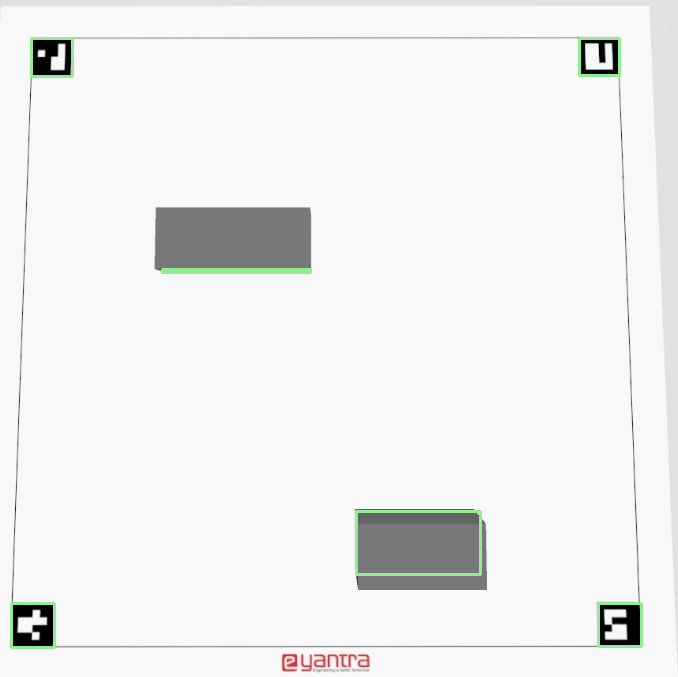

In [ ]:
# prompt: dont take the aruco marker directky flatten the image and find obstacle and frame with light green box and create a txt file with all previous details

import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image_path = 'prj2.jpg'  # Replace with your actual image path
image = cv2.imread(image_path)

if image is None:
    print("Could not open or find the image.")
    exit()

# Flatten the image (assuming you want to remove perspective distortion)
height, width = image.shape[:2]
flattened_image = cv2.resize(image, (width, height))  # Simple resize to flatten

# Convert flattened image to grayscale and apply a blur to prepare for obstacle detection
gray = cv2.cvtColor(flattened_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image to find obstacles
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# Label connected components (obstacles)
labels = measure.label(thresh, connectivity=2, background=0)
props = measure.regionprops(labels)

# Count the number of obstacles and calculate the total area covered
num_obstacles = len(props)
total_area = sum([prop.area for prop in props])

# Draw bounding boxes around obstacles in light green
for prop in props:
    min_row, min_col, max_row, max_col = prop.bbox
    cv2.rectangle(flattened_image, (min_col, min_row), (max_col, max_row), (144, 238, 144), 2)  # Light green color

# Display the flattened image with bounding boxes
cv2_imshow(flattened_image)

# Write the obstacle details to a text file
with open("obstacle_details.txt", "w") as file:
    file.write(f"Number of Obstacles: {num_obstacles}\n")
    file.write(f"Total Area covered by obstacles: {total_area}\n")

print("Obstacle detection completed. Results saved to 'obstacle_details.txt'.")


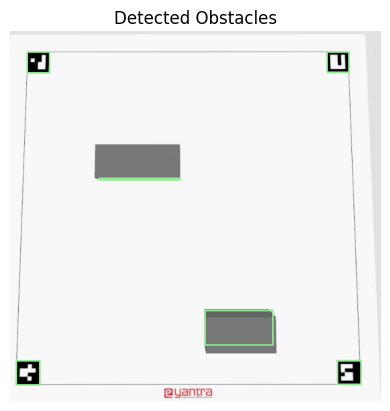

Obstacle detection completed. Results saved to 'obstacle_details.csv'.


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the image path
image_path = 'prj2.jpg'  # Replace with your actual image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare a list to store obstacle details
obstacle_data = []

# Filter and draw bounding boxes
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Filter out small areas
        # Get bounding box
        x, y, w, h = cv2.boundingRect(contour)
        obstacle_data.append({'x': x, 'y': y, 'width': w, 'height': h, 'area': area})

        # Draw light green bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), (144, 238, 144), 2)  # Light green color in BGR

# Display the image with detected obstacles
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.title('Detected Obstacles')
plt.show()

# Save the obstacle details to a CSV file
df = pd.DataFrame(obstacle_data)
df.to_csv('obstacle_details.csv', index=False)

print("Obstacle detection completed. Results saved to 'obstacle_details.csv'.")


In [ ]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

# Load the image
image_path = 'prj2.jpg'  # Replace with your actual image path
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load ArUco dictionary and detector parameters
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if ArUco markers were detected
if ids is not None and len(ids) >= 4:  # Check if at least 4 markers were detected
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Sort the detected corners to form the rectangle for perspective transform
    aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")

    # Sort ArUco points by their sum of coordinates (top-left, top-right, bottom-right, bottom-left)
    s = aruco_pts.sum(axis=1)
    rect = np.zeros((4, 2), dtype="float32")
    rect[0] = aruco_pts[np.argmin(s)]  # Top-left
    rect[2] = aruco_pts[np.argmax(s)]  # Bottom-right

    # Sort by difference between x and y (top-right, bottom-left)
    diff = np.diff(aruco_pts, axis=1)
    rect[1] = aruco_pts[np.argmin(diff)]  # Top-right
    rect[3] = aruco_pts[np.argmax(diff)]  # Bottom-left

    # Destination points for the perspective transform (flattening)
    dst = np.array([[0, 0], [500, 0], [500, 500], [0, 500]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    flattened_image = cv2.warpPerspective(image, M, (500, 500))

    # Display the flattened image
    plt.imshow(cv2.cvtColor(flattened_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.title('Flattened Image')
    plt.show()

    # Save the flattened image
    cv2.imwrite('flattened_image.jpg', flattened_image)
    print("Flattened image saved as 'flattened_image.jpg'.")
else:
    print("Error: Could not detect at least 4 ArUco markers.")


Error: Could not detect at least 4 ArUco markers.


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

In [ ]:
pip install opencv-contrib-python==4.6.0.66

In [ ]:
import cv2
import numpy as np

# Create Charuco board
squares_x = 5
squares_y = 7
square_length = 0.04  # 4 cm
marker_length = 0.02   # 2 cm

charuco_board = cv2.aruco.CharucoBoard(squares_x, squares_y, square_length, marker_length,
                                         cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50))

# Draw the board to an image
board_image = charuco_board.draw((600, 800))
cv2.imshow('Charuco Board', board_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = 'aruco_marker.png'  # Replace with your actual image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load a different ArUco dictionary (5x5 markers with 50 unique markers)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
aruco_params = cv2.aruco.DetectorParameters_create()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if ArUco markers were detected
if ids is not None:
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Draw detected markers on the image
    image_with_markers = cv2.aruco.drawDetectedMarkers(image.copy(), corners, ids)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image_with_markers, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.title('Detected ArUco Markers')
    plt.show()
else:
    print("No ArUco markers detected.")


No ArUco markers detected.


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage import measure

# Load the image
image_path = 'aruco_marker.png'  # Replace with your actual image path
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load ArUco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters_create()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Validate if ArUco markers were detected
if ids is not None and len(ids) >= 4:
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Sort the detected corners
    aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")

    # Sort ArUco points to form the rectangle for perspective transform
    s = aruco_pts.sum(axis=1)
    rect = np.zeros((4, 2), dtype="float32")
    rect[0] = aruco_pts[np.argmin(s)]
    rect[2] = aruco_pts[np.argmax(s)]
    diff = np.diff(aruco_pts, axis=1)
    rect[1] = aruco_pts[np.argmin(diff)]
    rect[3] = aruco_pts[np.argmax(diff)]

    # Destination points for the perspective transform
    dst = np.array([[0, 0], [500, 0], [500, 500], [0, 500]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    transformed = cv2.warpPerspective(image, M, (500, 500))

    # Convert transformed image to grayscale and apply a blur
    gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to find obstacles
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    # Label connected components (obstacles)
    labels = measure.label(thresh, connectivity=2, background=0)
    props = measure.regionprops(labels)

    # Prepare data for CSV
    obstacle_data = []
    for prop in props:
        min_row, min_col, max_row, max_col = prop.bbox
        area = prop.area
        centroid = prop.centroid
        obstacle_data.append({
            "Area": area,
            "Centroid": centroid,
            "Bounding Box": (min_col, min_row, max_col, max_row)
        })
        # Draw bounding boxes on the transformed image
        cv2.rectangle(transformed, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)

    # Convert to DataFrame and save to CSV
    df = pd.DataFrame(obstacle_data)
    df.to_csv('obstacle_details.csv', index=False)

    # Display the transformed image with bounding boxes
    cv2.imshow("Transformed Image with Obstacles", transformed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print("Obstacle details saved to 'obstacle_details.csv'.")
else:
    print("Error: Could not detect enough ArUco markers.")


Error: Could not detect enough ArUco markers.


In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage import measure

# Load the image
image_path = 'prj2.jpg'  # Replace with your actual image path
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image.")
    exit()

# Load ArUco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters_create()

# Detect ArUco markers
corners, ids, rejected = cv2.aruco.detectMarkers(image, aruco_dict, parameters=aruco_params)

# Check if markers are detected
if ids is not None:
    print(f"Detected ArUco markers: {ids.flatten()}")

    # Draw detected markers on the original image for visualization
    cv2.aruco.drawDetectedMarkers(image, corners, ids)
    cv2.imshow("Detected Markers", image)
    cv2.waitKey(0)

    # Sort the detected corners
    aruco_pts = np.array([corner[0] for corner in corners], dtype="float32")

    # Check if we have at least 4 markers for perspective transformation
    if len(ids) >= 4:
        # Sort ArUco points to form the rectangle for perspective transform
        s = aruco_pts.sum(axis=1)
        rect = np.zeros((4, 2), dtype="float32")
        rect[0] = aruco_pts[np.argmin(s)]
        rect[2] = aruco_pts[np.argmax(s)]
        diff = np.diff(aruco_pts, axis=1)
        rect[1] = aruco_pts[np.argmin(diff)]
        rect[3] = aruco_pts[np.argmax(diff)]

        # Destination points for the perspective transform
        dst = np.array([[0, 0], [500, 0], [500, 500], [0, 500]], dtype="float32")

        # Compute the perspective transform matrix and apply it
        M = cv2.getPerspectiveTransform(rect, dst)
        transformed = cv2.warpPerspective(image, M, (500, 500))

        # Convert transformed image to grayscale and apply a blur
        gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Threshold the image to find obstacles
        _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

        # Label connected components (obstacles)
        labels = measure.label(thresh, connectivity=2, background=0)
        props = measure.regionprops(labels)

        # Prepare data for CSV
        obstacle_data = []
        for prop in props:
            min_row, min_col, max_row, max_col = prop.bbox
            area = prop.area
            centroid = prop.centroid
            obstacle_data.append({
                "Area": area,
                "Centroid": centroid,
                "Bounding Box": (min_col, min_row, max_col, max_row)
            })
            # Draw bounding boxes on the transformed image
            cv2.rectangle(transformed, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)

        # Convert to DataFrame and save to CSV
        df = pd.DataFrame(obstacle_data)
        df.to_csv('obstacle_details.csv', index=False)

        # Display the transformed image with bounding boxes
        cv2.imshow("Transformed Image with Obstacles", transformed)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        print("Obstacle details saved to 'obstacle_details.csv'.")
    else:
        print("Error: Not enough ArUco markers detected for transformation.")
else:
    print("Error: No ArUco markers detected.")


Error: No ArUco markers detected.
